In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.sql import label
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
inspector_meas = inspect(engine)
#inspector.get_table_names()
columns = inspector_meas.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
inspector_stat = inspect(engine)
#inspector.get_table_names()
columns = inspector_stat.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [14]:
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [15]:
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

year_from_mrd = session.query(Measurement.date).filter(Measurement.date >= "2016-08-23").order_by(Measurement.date.asc())

pool = []
for date_query in year_from_mrd:
    pool.append(date_query.date)
    #print(date_query.date)
print(f"The most recent date in the list is {most_recent_date}")
print(f"There are {len(pool)} items in the list")

The most recent date in the list is ('2017-08-23',)
There are 2230 items in the list


In [21]:
last_day = "2016-08-23"
percipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_day).order_by(Measurement.date).all()

percipitation_df = pd.DataFrame(percipitation, columns = ["date", "percipitation"])
percipitation_df.set_index("date", inplace = True)
percipitation_df.dropna(how = "all", inplace = True)
percipitation_df.head(15)

,percipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


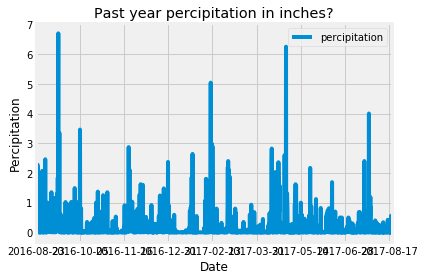

In [23]:
percipitation_df.plot()
plt.title(f"Past year percipitation in inches?")
plt.ylabel("Percipitation")
plt.xlabel("Date")
plt.tight_layout()

plt.show()

# Exploratory Climate Analysis

The most recent date in the list is ('2017-08-23',)
There are 2230 items in the list


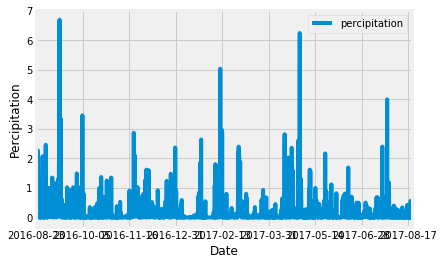

In [24]:
# Calculate the date 1 year ago from the last data point in the database
# Design a query to retrieve the last 12 months of precipitation data and plot the results

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_from_mrd = session.query(Measurement.date).filter(Measurement.date >= "2016-08-23").order_by(Measurement.date.asc())

pool = []
for date_query in year_from_mrd:
    pool.append(date_query.date)
print(f"The most recent date in the list is {most_recent_date}")
print(f"There are {len(pool)} items in the list")


# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

last_day = "2016-08-23"
percipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_day).order_by(Measurement.date).all()

percipitation_df = pd.DataFrame(percipitation, columns = ["date", "percipitation"])
percipitation_df.set_index("date", inplace = True)
percipitation_df.dropna(how = "all", inplace = True)
percipitation_df.head(15)

# Use Pandas Plotting with Matplotlib to plot the data

percipitation_df.plot()
plt.ylabel("Percipitation")
plt.xlabel("Date")
plt.show()

![precipitation](Images/precipitation.png)

In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percipitation_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [40]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Measurement.station).group_by(Measurement.station).count()
print(total_stations)

9


In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [43]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

top_station = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
top_station

('USC00519281', 54.0, 85.0, 71.66378066378067)

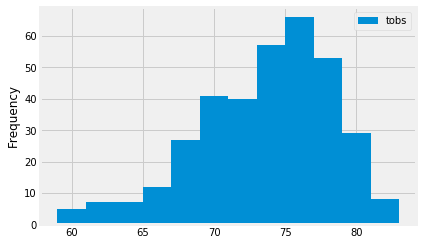

In [44]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == top_station[0]).\
                    filter(Measurement.date >= last_day).order_by(Measurement.date).all()

temps_data_df = pd.DataFrame(temps_data)
temps_data_df.set_index("date", inplace = True)
temps_data_df.dropna(how = "all", inplace = True)
#temps_data_df.head(15)

temps_data_df.plot.hist(bins=12)
plt.show()

![precipitation](Images/station-histogram.png)

In [68]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

def calc_temps(start_date, end_date):

    vacay = session.query(label('min_temp', func.min(Measurement.tobs)), label('avg_temp', func.avg(Measurement.tobs)), label('max_temp',func.max(Measurement.tobs))).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date)
    
    maxTemp = vacay[0].max_temp
    minTemp = vacay[0].min_temp
    avgTemp = vacay[0].avg_temp
    
    yError = maxTemp - minTemp
    
    temps_value = [avgTemp]
    temps_x = range(len(temps_value))
    
    fig,ax = plt.subplots(figsize=(2.5,5))
    ax.bar(temps_x, temps_value, yerr=yError, color='orange',alpha=0.6)
    ax.set_xticks([0]) 
    plt.xlabel("Average Temp for Time Period")
    plt.ylabel("Temperature")
    plt.title("Trip Avg Temp")
    plt.tight_layout()

    plt.show()

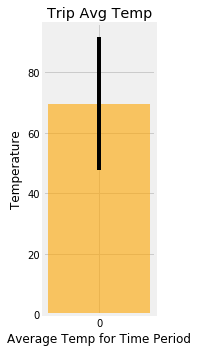

In [71]:
calc_temps("2012-02-08", "2012-03-05")
#datetime(2012,2,8)#datetime(2012,3,5))

In [73]:
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [74]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def total_rainfall(start_date, end_date):

    rainfall = session.query(Station.name, Station.station, label('avg_rainfall',func.avg(Measurement.prcp)), Station.latitude, Station.longitude, Station.elevation).\
                    filter(Measurement.station == Station.station).\
                    filter(Measurement.date >= "2012-02-08").\
                    filter(Measurement.date <= "2012-03-05").\
                    group_by(Station.name,Station.station).order_by(func.avg(Measurement.prcp).desc())
    
    rainfall_df = pd.DataFrame(rainfall)
    rainfall_df.set_index("name", inplace = True)
    return rainfall_df

total_rainfall("2012-02-08", "2012-03-05")

,station,avg_rainfall,latitude,longitude,elevation
name,,,,,
"UPPER WAHIAWA 874.3, HI US",USC00518838,0.640000,21.49920,-158.01110,306.6
"MANOA LYON ARBO 785.2, HI US",USC00516128,0.638519,21.33310,-157.80250,152.4
"WAIHEE 837.5, HI US",USC00519281,0.500370,21.45167,-157.84889,32.9
"KANEOHE 838.1, HI US",USC00513117,0.253704,21.42340,-157.80150,14.6
"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,0.140370,21.33556,-157.71139,19.5
"WAIKIKI 717.2, HI US",USC00519397,0.062222,21.27160,-157.81680,3.0
"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,0.059259,21.31520,-157.99920,0.9
"PEARL CITY, HI US",USC00517948,0.035556,21.39340,-157.97510,11.9
"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,0.033529,21.52130,-157.83740,7.0


## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [31]:
# Plot the daily normals as an area plot with `stacked=False`
